## Introduction:
For the project of the best neighborhood in Pittsburgh, I thought that public safety would be an important factor for making a zone favorable. The Metric that I ended up choosing for this was the amount fires in each area, which was in contention with the crime rate of the individual places within the city. This means that the actual Metric ended up becoming the number of fires in each area, with lower numbers being better.

## The Metric:
The Metric is the number of fires in each area, with lower numbers being better. This is going to be taken from the Fire Incidents in the City of Pittsburgh dataset, as it gives me all the information I need.

[Fire Incidents in the City of Pittsburgh](https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02)

## The Best Neighborhood:

The first thing I did was import all of the libraries I needed into the notebook so that I could load in the .csv file as well as create visualizations with the data I made.

In [49]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Once I did that I read the .csv file for the different fires, which would be counted by neighborhood leaving the neighborhood with the lowest number of fires as the best neighborhood. Once I had them counted, I grouped them and decided to sort them in ascending order so that the top value would show as the first one.

In [54]:
fires = pd.read_csv("Fires.csv")
fireHood = dict()
fires.groupby("neighborhood").count()
fireCounts = []
for i in range(len(fires['neighborhood'])):
    fireCounts.append(1)
fires['fireCounts'] = fireCounts
num_fires = fires.groupby("neighborhood").sum()['fireCounts']
num_fires = num_fires.sort_values(ascending=True)
print(num_fires)

neighborhood
Mount Oliver Borough           6
Regent Square                  7
Mt. Oliver                    11
St. Clair                     11
East Carnegie                 11
                            ... 
Hazelwood                    217
South Side Flats             225
Central Business District    232
Squirrel Hill South          233
Carrick                      262
Name: fireCounts, Length: 91, dtype: int64


After finding out the best neighborhood using the neighborhood column, I decided to make a list sorted by the value of fires in that neighborhood so that I could see all of the counts and not just the top and bottom 5. The result was the list with 1129 fires with no location associated with them.

In [61]:
for index, row in fires.iterrows():
    if row["neighborhood"] not in fireHood:
        fireHood[row["neighborhood"]] =1
    else:
        fireHood[row["neighborhood"]] +=1
sort_by_largest = sorted(fireHood.items(), key=lambda x: x[1], reverse=True)
print (sort_by_largest)

[(nan, 1129), ('Carrick', 262), ('Squirrel Hill South', 233), ('Central Business District', 232), ('South Side Flats', 225), ('Hazelwood', 217), ('East Liberty', 188), ('Mount Washington', 183), ('Lincoln-Lemington-Belmar', 177), ('Homewood South', 174), ('Homewood North', 171), ('Brookline', 163), ('Shadyside', 157), ('Sheraden', 156), ('Knoxville', 156), ('Bloomfield', 151), ('Perry South', 151), ('East Hills', 147), ('Brighton Heights', 135), ('Beechview', 129), ('Bluff', 123), ('Marshall-Shadeland', 121), ('Larimer', 118), ('Beltzhoover', 117), ('Allentown', 115), ('North Oakland', 115), ('Squirrel Hill North', 115), ('East Allegheny', 113), ('Central Northside', 112), ('Perry North', 102), ('Greenfield', 100), ('Garfield', 98), ('Spring Hill-City View', 96), ('Middle Hill', 95), ('Crawford-Roberts', 92), ('South Side Slopes', 85), ('Central Oakland', 85), ('Terrace Village', 82), ('South Oakland', 77), ('Crafton Heights', 76), ('Highland Park', 73), ('Central Lawrenceville', 69), 

Due to 1129 fires not having an associated neighborhood, I decided to use different values instead, those being the latitude and longitude of the fires as well as the zipcodes connected to the addresses. Using these latitudes and longitudes I made a hexbin recreating the map of the city, displaying the number of fires in each hexagon.

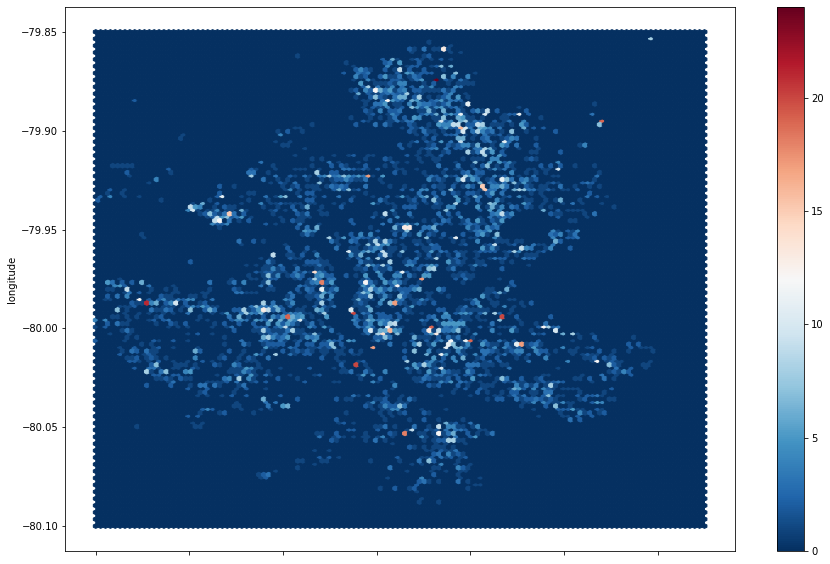

In [62]:
fires.plot.hexbin(x='latitude', y='longitude', gridsize=125,cmap="RdBu_r",figsize=(15, 10),extent=(40.38,40.51,-80.1,-79.85))

This visualization does not necessarily help with the decision of finding the best neigborhood as it doesn't sort by neighborhood at all, relying solely on the coordinates. This makes it difficult to decipher which fire counts towards which area, leaving only the last option of zip codes stored as a part of the addresses to decide on the best neighborhood.

In [63]:
zip_codes = dict()
for index, row in fires.iterrows():
    temp = row["address"].split()
    temp_zip = temp[len(temp)-1]
    if temp_zip not in zip_codes:
        zip_codes[temp_zip] =1
    else:
        zip_codes[temp_zip] +=1
        
sort_by_largest = sorted(zip_codes.items(), key=lambda x: x[1], reverse=True)
print (sort_by_largest)

[('15212', 970), ('15206', 814), ('15210', 775), ('15219', 725), ('15221', 644), ('15207', 424), ('15208', 418), ('15213', 407), ('15217', 384), ('15203', 330), ('15214', 308), ('15204', 270), ('15201', 241), ('15226', 212), ('15216', 209), ('15211', 186), ('15224', 181), ('15220', 178), ('15222', 178), ('15233', 174), ('15205', 125), ('15232', 87), ('15120', 38), ('15218', 25), ('15227', 20), ('15238', 20), ('15235', 19), ('15223', 15), ('15017', 13), ('PA', 11), ('15234', 6), ('15215', 3), ('15228', 3), ('15209', 3), ('15126', 2), ('15202', 2), ('15229', 2), ('15236', 1), ('15241', 1), ('15123', 1), ('15116', 1), ('15237', 1), ('15230', 1), ('15122', 1), ('15121', 1), ('15295', 1), ('15261', 1), ('1521', 1), ('ZIPCODE', 1)]


As can be seen in that list, there were a few input errors that needed to be addressed, such as a missing zipcode or a mistyped one. After removing these outliers, I was able to make a list of zip codes and a list their associated values at the same index, allowing for the creation of the second visual. The visual is a horizontal bar chart showing the number of fires in a zipcode, displaying the massive difference in fire safety between the neighborhoods.

<BarContainer object of 46 artists>

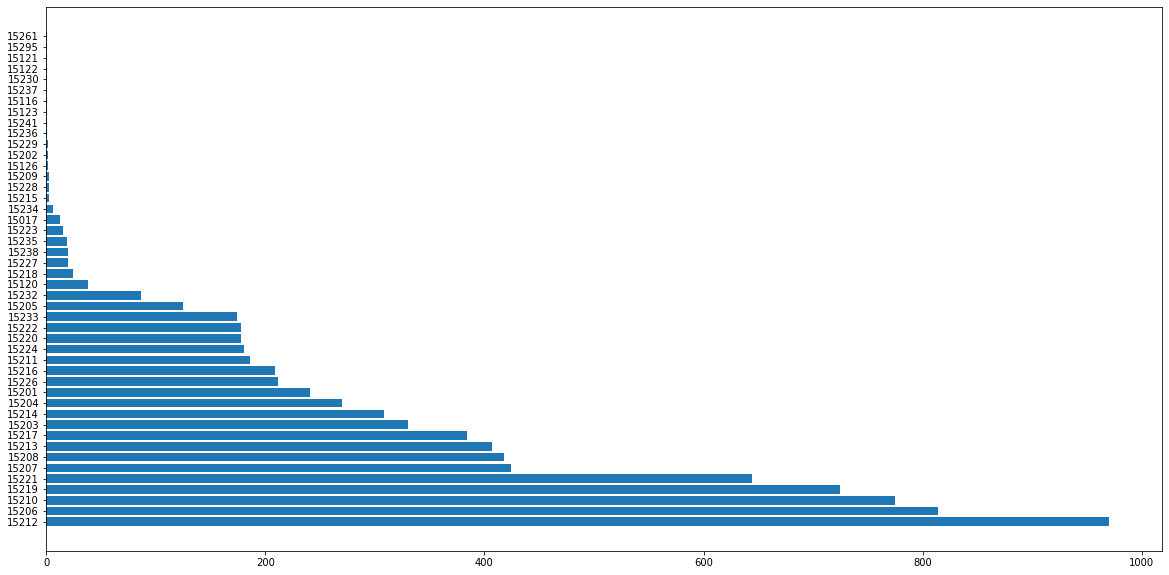

In [59]:
keys = []
values = []
for item in sort_by_largest:
    keys.append(item[0]), values.append(item[1])
#Removing ZIPCODE error data
del keys[48]
del values[48]
#Removing 1521 error data
del keys[47]
del values[47]
#Removing PA error data
del keys[29]
del values[29]
plt.figure(figsize=(20, 10))
plt.barh(keys,values)

## Conclusion:

There were 11 zip codes tied for first in this criteria, however 10 of them have little information or are special zipcodes with specific intent such as universities or business district associations that neither of my groupmates had. With this I decided that 15236 was the best neighborhood, due to the fact that it had 1 fire and had a neighborood connected to it. This zipcode ended up being Pleasant Hills, which makes sense due to its low population density and the fact that it is a residential zone. Although I have never been there, the information I could gather about the place is exactly what I was expecting to see win due to the way I used the statistic, as smaller neighborhoods ought to have less fires in general, with the ones located further out being less involved with the Pittsburgh fire department.